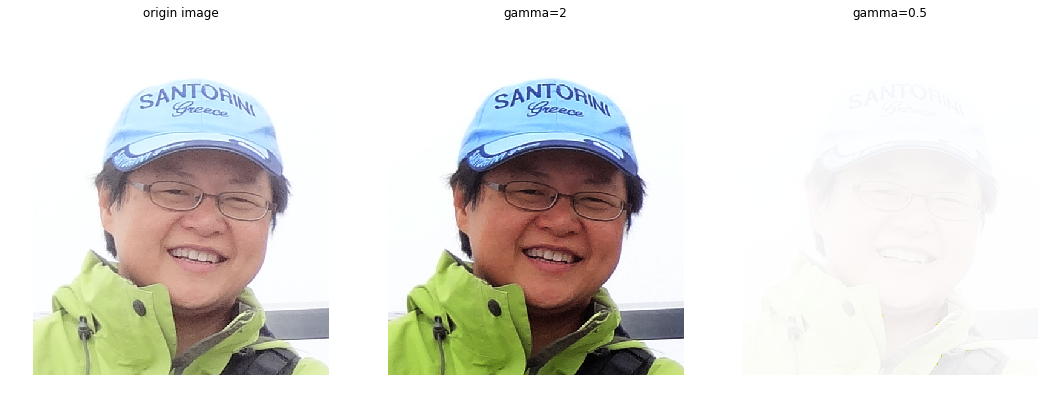

In [5]:
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread('賴詩萍2.png')
gam1= exposure.adjust_gamma(image, 2)   #调暗
gam2= exposure.adjust_gamma(image, 0.05)  #调亮
plt.figure('adjust_gamma',figsize=(18,18))

plt.subplot(131)
plt.title('origin image')
plt.imshow(image,plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.title('gamma=2')
plt.imshow(gam1,plt.cm.gray)
plt.axis('off')

plt.subplot(133)
plt.title('gamma=0.5')
plt.imshow(gam2,plt.cm.gray)
plt.axis('off')

plt.show()


def augment_image(rgbImg):
    augmented_images = []
    
    # original image
    augmented_images.append(rgbImg)

    # fliped x-axis
    rimg = rgbImg.copy()
    cv2.flip(rimg, 1, rimg)
    augmented_images.append(rimg)

    # add gaussian noise
    for _ in range(10):
        gaussian_noise = rgbImg.copy()
        cv2.randn(gaussian_noise, 0, 150)
        augmented_images.append(rgbImg + gaussian_noise)
        augmented_images.append(rimg + gaussian_noise)

    for _ in range(10):
        uniform_noise = rgbImg.copy()
        cv2.randu(uniform_noise, 0, 1)
        augmented_images.append(rgbImg + uniform_noise)
        augmented_images.append(rimg + uniform_noise)

        plt.title('gamma=0.5')
        plt.imshow(augmented_images,plt.cm.gray)
        plt.show()
        
    return augmented_images

In [32]:
import cv2
import numpy as np


def show_image_and_wait(title, image):
    # Display the image in a window.  Window size fits image.
    cv2.imshow(title, image)

    # Wait for user input; click X to destroy window.
    cv2.waitKey(0)

    # Destroy window and return to caller.
    cv2.destroyAllWindows()

def add_gaussian_noise(image_in, noise_sigma):
    temp_image = np.float64(np.copy(image_in))

    h = temp_image.shape[0]
    w = temp_image.shape[1]
    noise = np.random.randn(h, w) * noise_sigma

    noisy_image = np.zeros(temp_image.shape, np.float64)
    if len(temp_image.shape) == 2:
        noisy_image = temp_image + noise
    else:
        noisy_image[:,:,0] = temp_image[:,:,0] + noise
        noisy_image[:,:,1] = temp_image[:,:,1] + noise
        noisy_image[:,:,2] = temp_image[:,:,2] + noise

    """
    print('min,max = ', np.min(noisy_image), np.max(noisy_image))
    print('type = ', type(noisy_image[0][0][0]))
    """

    return noisy_image

def convert_to_uint8(image_in):
    temp_image = np.float64(np.copy(image_in))
    cv2.normalize(temp_image, temp_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)

    return temp_image.astype(np.uint8)

def main():
    girl_face_filename = "girl_face_closeup.jpg"
    print('opening image: ', girl_face_filename)

    # cv2.IMREAD_COLOR - read in color images (BGR)
    # cv2.IMREAD_GRAYSCALE - convert image to grayscale
    girl_face_image = cv2.imread(girl_face_filename, cv2.IMREAD_UNCHANGED)
    girl_face_grayscale_image = cv2.cvtColor(girl_face_image, cv2.COLOR_BGR2GRAY)

    """
    Gaussian is a nice noise function.  Gaussian noise are values generated from the
    random normal distribution.  The mean of the distribution is 0 and the standard
    deviation is 1.  The standard deviation is a measure of how spread out the values
    are from the mean or 0.  randn() generates random numbers from this distribution.
    The Gaussian distribution is symmetric about the mean of the probability.

    Sigma determines the magnitude of the noise function.  For a small sigma, the noise
    function produces values very close to zero or a gray image since we want to map the
    pixel with a value of zero to gray.  The larger sigma spreads out the noise.
    Multiplying an image by a noise image generated from a Gaussian function effectively
    changes the standard deviation of the pixel values.  This is how far apart the pixel
    colors are in value.
    """
    noisy_sigma = 35
    noisy_image = add_gaussian_noise(girl_face_grayscale_image, noisy_sigma)

    print('noisy image shape: {0}, len of shape {1}'.format(\
        girl_face_image.shape, len(noisy_image.shape)))
    print('    WxH: {0}x{1}'.format(noisy_image.shape[1], noisy_image.shape[0]))
    print('    image size: {0} bytes'.format(noisy_image.size))

    show_image_and_wait(girl_face_filename, convert_to_uint8(noisy_image))
    noisy_filename = 'girl_face_noise_' + str(noisy_sigma) + '.jpg'
    cv2.imwrite(noisy_filename, noisy_image)

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'cv2'

In [6]:
from numpy.testing import assert_array_equal, assert_allclose, assert_raises
  
import numpy as np
from skimage.data import camera
from skimage.util import random_noise, img_as_float
  
def test_set_seed():
    seed = 42
    cam = camera()
    test = random_noise(cam, seed=seed)
    assert_array_equal(test, random_noise(cam, seed=seed))
  
  
def test_salt():
    seed = 42
    cam = img_as_float(camera())
    cam_noisy = random_noise(cam, seed=seed, mode='salt', amount=0.15)
    saltmask = cam != cam_noisy
  

In [10]:
from numpy import shape  
import random  
def PepperandSalt(src,percetage):  
    NoiseImg=src  
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])  
    for i in range(NoiseNum):  
        randX=random.randint(0,src.shape[0]-1)  
        randY=random.randint(0,src.shape[1]-1)  
        if random.random_integers(0,1)<=0.5:  
            NoiseImg[randX,randY]=0  
        else:  
            NoiseImg[randX,randY]=255            
    return NoiseImg   
def GaussianNoise(src,means,sigma,percetage):  
    NoiseImg=src  
    NoiseNum=int(percetage*src.shape[0]*src.shape[1])  
    for i in range(NoiseNum):  
        randX=random.randint(0,src.shape[0]-1)  
        randY=random.randint(0,src.shape[1]-1)  
        NoiseImg[randX, randY]=NoiseImg[randX,randY]+random.gauss(means,sigma)  
        if  NoiseImg[randX, randY]< 0:  
                 NoiseImg[randX, randY]=0  
        elif NoiseImg[randX, randY]>255:  
                 NoiseImg[randX, randY]=255  
    return NoiseImg   
img=mpimg.imread('賴詩萍2.png')
img1=GaussianNoise(img,2,4,0.8)  
gam1= exposure.adjust_gamma(image, 2)   #调暗
gam2= exposure.adjust_gamma(image, 0.05)  #调亮
plt.figure('adjust_gamma',figsize=(18,18))

plt.subplot(131)
plt.title('origin image')
plt.imshow(image,plt.cm.gray)
plt.axis('off')

plt.subplot(132)
plt.title('gamma=2')
plt.imshow(gam1,plt.cm.gray)
plt.axis('off')

plt.subplot(133)
plt.title('gamma=0.5')
plt.imshow(gam2,plt.cm.gray)
plt.axis('off')

plt.show()


def augment_image(rgbImg):
    augmented_images = []
    
    # original image
    augmented_images.append(rgbImg)

    # fliped x-axis
    rimg = rgbImg.copy()
    cv2.flip(rimg, 1, rimg)
    augmented_images.append(rimg)

    # add gaussian noise
    for _ in range(10):
        gaussian_noise = rgbImg.copy()
        cv2.randn(gaussian_noise, 0, 150)
        augmented_images.append(rgbImg + gaussian_noise)
        augmented_images.append(rimg + gaussian_noise)

    for _ in range(10):
        uniform_noise = rgbImg.copy()
        cv2.randu(uniform_noise, 0, 1)
        augmented_images.append(rgbImg + uniform_noise)
        augmented_images.append(rimg + uniform_noise)

        plt.title('gamma=0.5')
        plt.imshow(augmented_images,plt.cm.gray)
        plt.show()
        
    return augmented_images

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()